Start with 3 instances and add 1000 balls:

1- Create a ConsistentHashRing object with 3 nodes.
- Add 1000 keys to the hash ring.
- Visualize the distribution of keys among nodes.
- Add one node and observe the distribution:
- Add weights to each ball and observe the distribution:

2- Add one more node to the hash ring.
- Visualize the distribution of keys among nodes after adding the new node.
- Add three nodes and observe the distribution:

3- Add three more nodes to the hash ring.
- Visualize the distribution of keys among nodes after adding the new nodes.
- Change the size of the balls (randomize) and observe the distribution:

4- Generate random sizes for the keys.
- Add the keys with random sizes to the hash ring.
- Visualize the distribution of keys among nodes.
- Add virtual nodes and observe the distribution:

5- Modify the ConsistentHashRing class to include virtual nodes.
- Add virtual nodes to the hash ring.
- Visualize the distribution of keys among nodes with virtual nodes.
- Add weights to the hash ring and observe the distribution:

6- Modify the ConsistentHashRing class to include weights for nodes.
- Add nodes with different weights to the hash ring.
- Visualize the distribution of keys among nodes with weighted nodes.

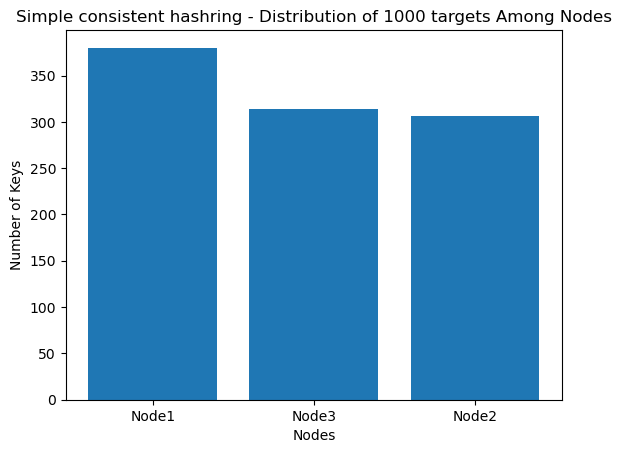

In [8]:
import hashlib
import numpy as np
import matplotlib.pyplot as plt

# Define the ConsistentHashRing class (you can reuse the class definition from earlier)
class ConsistentHashRing:
    def __init__(self, replicas=100):
        self.replicas = replicas
        self.nodes = {}

    def add_node(self, node):
        for i in range(self.replicas):
            key = self._hash("{}{}".format(node, i))
            self.nodes[key] = node

    def remove_node(self, node):
        for i in range(self.replicas):
            key = self._hash("{}{}".format(node, i))
            del self.nodes[key]

    def get_node(self, key):
        if not self.nodes:
            return None
        hashed_key = self._hash(key)
        for node_key in sorted(self.nodes.keys()):
            if hashed_key <= node_key:
                return self.nodes[node_key]
        return self.nodes[min(self.nodes.keys())]

    def _hash(self, key):
        return int(hashlib.md5(key.encode()).hexdigest(), 16)

# Create a ConsistentHashRing object with 3 nodes
hash_ring = ConsistentHashRing(replicas=100)

# Add 3 nodes to the hash ring
nodes = ['Node1', 'Node2', 'Node3']
for node in nodes:
    hash_ring.add_node(node)

# Add 1000 keys to the hash ring
keys = [f'key{i}' for i in range(1000)]
distribution = {}
for key in keys:
    node = hash_ring.get_node(key)
    if node in distribution:
        distribution[node] += 1
    else:
        distribution[node] = 1

# Visualize the distribution of keys among nodes
plt.bar(distribution.keys(), distribution.values())
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Simple consistent hashring - Distribution of 1000 targets Among Nodes')
plt.show()


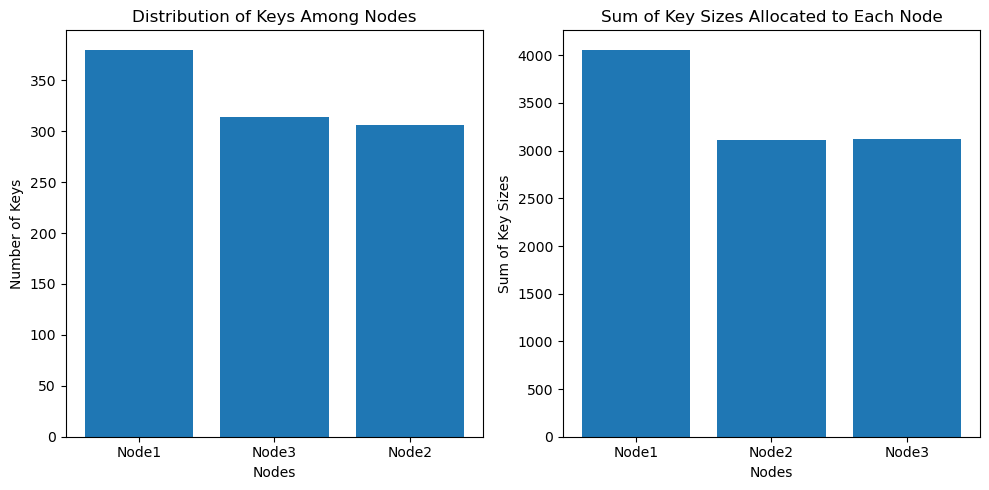

In [13]:
import random

# Create a ConsistentHashRing object with 3 nodes
hash_ring = ConsistentHashRing(replicas=100)

# Add 3 nodes to the hash ring
nodes = ['Node1', 'Node2', 'Node3']
for node in nodes:
    hash_ring.add_node(node)

# Add keys with random sizes from 1 to 20 to the hash ring
keys = [(f'key{i}', random.randint(1, 20)) for i in range(1000)]
distribution = {}
size_distribution = {}
for key, size in keys:
    node = hash_ring.get_node(key)
    if node in distribution:
        distribution[node] += 1
        size_distribution[node].append(size)
    else:
        distribution[node] = 1
        size_distribution[node] = [size]

# Visualize the distribution of keys among nodes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(distribution.keys(), distribution.values())
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Distribution of Keys Among Nodes')

# Calculate the sum of key sizes allocated to each node
node_sums = {node: sum(size_distribution[node]) for node in nodes}

# Visualize the sum of key sizes allocated to each node
plt.subplot(1, 2, 2)
plt.bar(node_sums.keys(), node_sums.values())
plt.xlabel('Nodes')
plt.ylabel('Sum of Key Sizes')
plt.title('Sum of Key Sizes Allocated to Each Node')

plt.tight_layout()
plt.show()

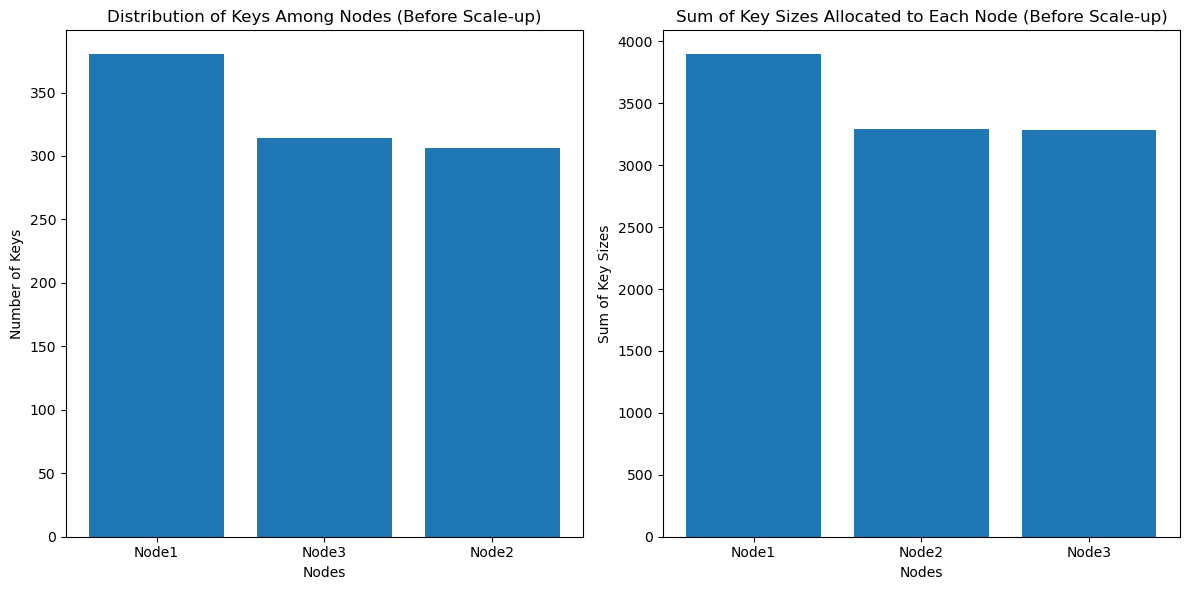

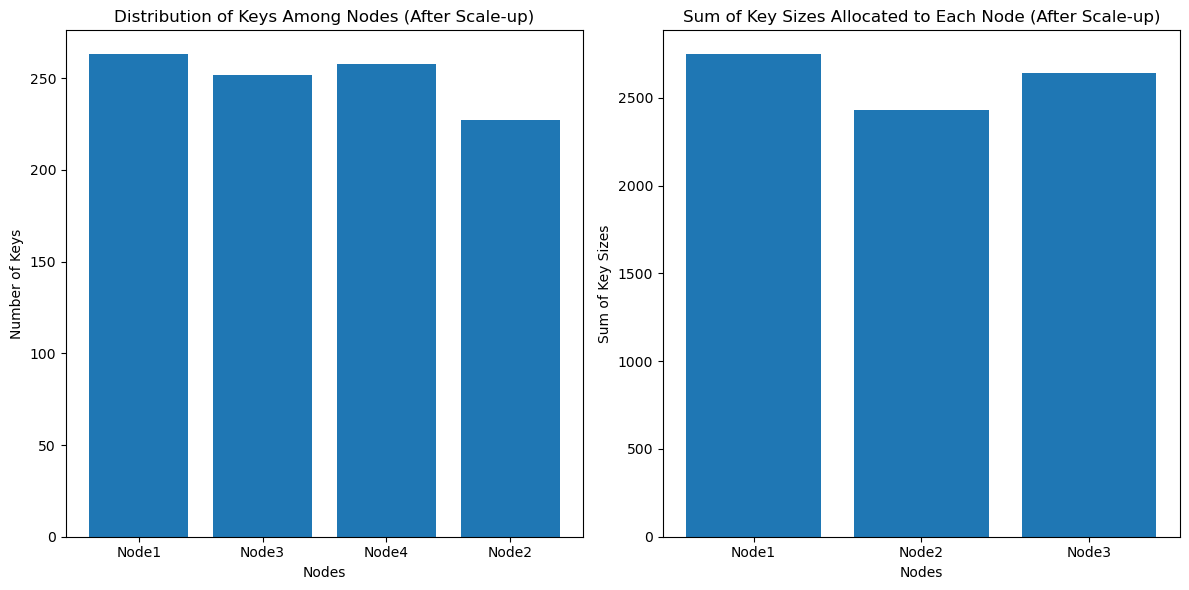

In [14]:
# Start with 3 nodes and distribute the keys
hash_ring = ConsistentHashRing(replicas=100)
nodes = ['Node1', 'Node2', 'Node3']
for node in nodes:
    hash_ring.add_node(node)

keys = [(f'key{i}', random.randint(1, 20)) for i in range(1000)]
distribution_before = {}
size_distribution_before = {}
for key, size in keys:
    node = hash_ring.get_node(key)
    if node in distribution_before:
        distribution_before[node] += 1
        size_distribution_before[node].append(size)
    else:
        distribution_before[node] = 1
        size_distribution_before[node] = [size]

# Visualize the distribution of keys and the sum of key sizes allocated to each node
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(distribution_before.keys(), distribution_before.values())
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Distribution of Keys Among Nodes (Before Scale-up)')

node_sums_before = {node: sum(size_distribution_before[node]) for node in nodes}
plt.subplot(1, 2, 2)
plt.bar(node_sums_before.keys(), node_sums_before.values())
plt.xlabel('Nodes')
plt.ylabel('Sum of Key Sizes')
plt.title('Sum of Key Sizes Allocated to Each Node (Before Scale-up)')

plt.tight_layout()
plt.show()

# Add one more node to the ring
new_node = 'Node4'
hash_ring.add_node(new_node)

# Redistribute the keys in the ring
distribution_after = {}
size_distribution_after = {}
for key, size in keys:
    node = hash_ring.get_node(key)
    if node in distribution_after:
        distribution_after[node] += 1
        size_distribution_after[node].append(size)
    else:
        distribution_after[node] = 1
        size_distribution_after[node] = [size]

# Visualize the distribution of keys and the sum of key sizes allocated to each node after scale-up
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(distribution_after.keys(), distribution_after.values())
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Distribution of Keys Among Nodes (After Scale-up)')

node_sums_after = {node: sum(size_distribution_after[node]) for node in nodes}
plt.subplot(1, 2, 2)
plt.bar(node_sums_after.keys(), node_sums_after.values())
plt.xlabel('Nodes')
plt.ylabel('Sum of Key Sizes')
plt.title('Sum of Key Sizes Allocated to Each Node (After Scale-up)')

plt.tight_layout()
plt.show()


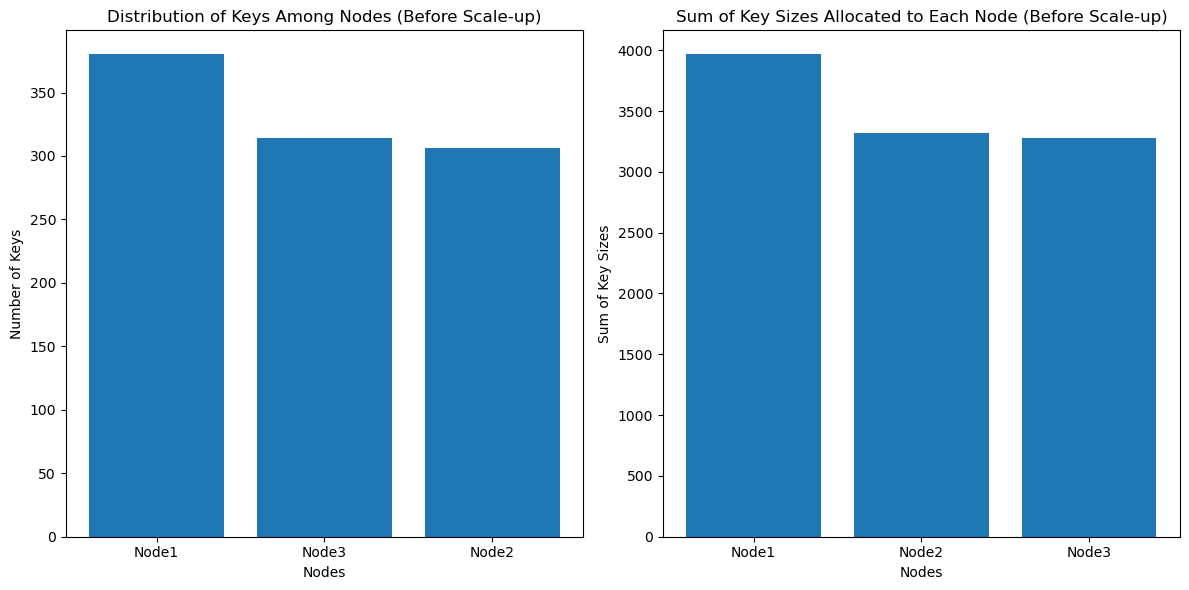

Keys to redistribute from Node1: [('key0', 2), ('key8', 1), ('key17', 20), ('key20', 19), ('key26', 14), ('key27', 14), ('key28', 19), ('key31', 16), ('key32', 3), ('key40', 19), ('key42', 10), ('key43', 8), ('key46', 16), ('key51', 8), ('key53', 12), ('key54', 20), ('key55', 2), ('key58', 12), ('key59', 10), ('key60', 14), ('key64', 10), ('key65', 6), ('key70', 9), ('key76', 10), ('key78', 11), ('key79', 19), ('key85', 12), ('key87', 8), ('key88', 8), ('key89', 4), ('key91', 8), ('key96', 11), ('key98', 5), ('key100', 4), ('key104', 7), ('key105', 19), ('key110', 18), ('key113', 7), ('key114', 2), ('key119', 17), ('key120', 3), ('key122', 15), ('key123', 10), ('key124', 3), ('key126', 1), ('key133', 18), ('key137', 14), ('key139', 2), ('key147', 15), ('key149', 15), ('key152', 18), ('key169', 12), ('key171', 20), ('key172', 19), ('key174', 6), ('key180', 5), ('key181', 19), ('key190', 1), ('key197', 16), ('key198', 14), ('key204', 12), ('key206', 3), ('key211', 18), ('key217', 16), ('

KeyError: 256609979731626951909711390769263905982

In [18]:
# Start with 3 nodes and distribute the keys
hash_ring = ConsistentHashRing(replicas=100)
nodes = ['Node1', 'Node2', 'Node3']
for node in nodes:
    hash_ring.add_node(node)

keys = [(f'key{i}', random.randint(1, 20)) for i in range(1000)]
distribution_before = {}
size_distribution_before = {}
for key, size in keys:
    node = hash_ring.get_node(key)
    if node in distribution_before:
        distribution_before[node] += 1
        size_distribution_before[node].append(size)
    else:
        distribution_before[node] = 1
        size_distribution_before[node] = [size]

# Visualize the distribution of keys and the sum of key sizes allocated to each node
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(distribution_before.keys(), distribution_before.values())
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Distribution of Keys Among Nodes (Before Scale-up)')

node_sums_before = {node: sum(size_distribution_before[node]) for node in nodes}
plt.subplot(1, 2, 2)
plt.bar(node_sums_before.keys(), node_sums_before.values())
plt.xlabel('Nodes')
plt.ylabel('Sum of Key Sizes')
plt.title('Sum of Key Sizes Allocated to Each Node (Before Scale-up)')

plt.tight_layout()
plt.show()

# Add one more node to the ring
new_node = 'Node4'
hash_ring.add_node(new_node)

# Redistribute the keys in the ring by moving keys from one existing node to the new node
existing_node = nodes[0]  # Choose the first existing node to redistribute its keys
keys_to_redistribute = [(key, size) for key, size in keys if hash_ring.get_node(key) == existing_node]

print(f"Keys to redistribute from {existing_node}: {keys_to_redistribute}")

# Remove redistributed keys from the existing node
for key, _ in keys_to_redistribute:
    hash_ring.remove_node(existing_node)

# Add redistributed keys to the new node
for key, size in keys_to_redistribute:
    hash_ring.add_node(new_node)
    size_distribution_before[new_node].append(size)

# Visualize the distribution of keys and the sum of key sizes allocated to each node after scale-up
distribution_after = distribution_before.copy()
size_distribution_after = size_distribution_before.copy()
distribution_after[new_node] = len(keys_to_redistribute)
size_distribution_after[new_node] = size_distribution_before[new_node]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(distribution_after.keys(), distribution_after.values())
plt.xlabel('Nodes')
plt.ylabel('Number of Keys')
plt.title('Distribution of Keys Among Nodes (After Scale-up)')

node_sums_after = {node: sum(size_distribution_after[node]) for node in nodes}
plt.subplot(1, 2, 2)
plt.bar(node_sums_after.keys(), node_sums_after.values())
plt.xlabel('Nodes')
plt.ylabel('Sum of Key Sizes')
plt.title('Sum of Key Sizes Allocated to Each Node (After Scale-up)')

plt.tight_layout()
plt.show()


